In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
# %matplotlib widget    # interactive 3d plots
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
import model_training

# Feature (MFCC) extraction (Dataset generation)

In [2]:
# run this function if you need to generate a csv data set from scratch
# data_loader.generate_csv_dataset()
data_loader.generate_csv_dataset(use_vad=False, use_delta_mfcc=True)


{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': False}
INFO: n_fft=4096
{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': False}


100%|██████████| 1440/1440 [05:45<00:00,  4.16it/s]


--- Data loaded. Loading time: 345.92191553115845 seconds ---
X.shape =  (1440, 160)
y.shape =  (1440, 1)
ID.shape =  (1440, 1)


('data/feature_mfcc_delta_nfft_4096.csv', 'data/y_labels.csv', 'data/IDs.csv')

# Loading Dataset

In [3]:
# X, y, ID = data_loader.load_dataset()
# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_4096.csv', 
#                                     y_path='data/y_labels_4096.csv',
#                                     ID_path='data/IDs_4096.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_8192.csv', 
#                                     y_path='data/y_labels_8192.csv',
#                                     ID_path='data/IDs_8192.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_16384.csv', 
#                                     y_path='data/y_labels_16384.csv',
#                                     ID_path='data/IDs_16384.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_32768.csv', 
#                                     y_path='data/y_labels_32768.csv',
#                                     ID_path='data/IDs_32768.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_8192_vad.csv', 
#                                     y_path='data/y_labels_8192.csv',
#                                     ID_path='data/IDs_8192.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_4096_vad.csv', 
#                                     y_path='data/y_labels_4096.csv',
#                                     ID_path='data/IDs_4096.csv')

X, y, ID = data_loader.load_dataset(X_path='data/feature_mfcc_delta_nfft_4096.csv', 
                                    y_path='data/y_labels.csv',
                                    ID_path='data/IDs.csv')

# ID['0'].unique()    # actors
group_members= data_loader.get_k_fold_group_member()
X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X, y, ID, group_members)
# print(len(X_k_folds))

data loaded in 0.04054141044616699ms
          0         1         2         3         4         5         6  \
0  1.262064  0.559099  1.127202  1.028767  0.782628  0.416169  0.922876   
1  0.619353  0.271546  1.415962  1.036916  0.646731  0.879723  0.623126   
2  1.612653  0.491839  1.199638  0.718815  0.823601  0.625229  0.427912   
3  0.633679  0.681817  0.774481  0.872321  1.085673  0.850478  0.248430   
4  1.880823  0.701174  1.516193  1.016059  0.986903  0.396255  0.752020   

          7         8         9  ...        68        69        70        71  \
0 -1.030790 -0.437691  0.988884  ... -1.057626 -0.709507 -0.966676 -0.904106   
1 -0.789153  0.103614  1.001272  ... -0.851054 -0.696531 -1.182908 -0.810364   
2 -0.906554 -0.796344  1.040167  ... -1.282965 -1.147002 -1.026193 -0.951325   
3 -0.499117 -0.497405  1.093443  ... -0.710971 -0.935751 -0.511684 -0.856036   
4 -0.763887 -1.002145  0.951467  ... -0.991594 -1.116439 -1.191915 -0.740528   

         72        73        74

# GridSearch SVM-RBF

In [10]:
# del UAR_surf, UAR_list

In [4]:
# C = [0.01, 0.05, 0.1, 1.0, 10, 100]
# gamma = [100, 10, 1, 0.1, 0.01, 0.001]

C = np.logspace(-1, 2, 12, endpoint=True)
gamma = np.logspace(-3.5, -1.5, 10, endpoint=True)

UAR_list = []
UAR_best = 0
UAR_surf = np.zeros((len(C),len(gamma)))

for i in range(len(C)):
    for j in range(len(gamma)):
        model = SVC(kernel = 'rbf', C=C[i], gamma=gamma[j], random_state = 42)
        UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
        UAR_surf[i,j] = UAR
        if UAR_best<UAR:
            UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
            C_best = C[i]
            gamma_best = gamma[j]
            print(f'C = {C[i]:.6f}, gamma = {gamma[j]:.6f}')
        UAR_list.append(UAR) 

print(f'UAR_best = {UAR_best:.3f}, C_best = {C_best:.6f}, gamma_best = {gamma_best:.6f}')

100%|██████████| 5/5 [00:01<00:00,  4.13it/s]


UAR = 0.277
C = 0.100000, gamma = 0.000316


100%|██████████| 5/5 [00:01<00:00,  4.11it/s]


UAR = 0.278
C = 0.100000, gamma = 0.000527


100%|██████████| 5/5 [00:01<00:00,  4.05it/s]


UAR = 0.283
C = 0.100000, gamma = 0.000880


100%|██████████| 5/5 [00:01<00:00,  4.11it/s]


UAR = 0.286
C = 0.100000, gamma = 0.001468


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


UAR = 0.301
C = 0.100000, gamma = 0.002448


100%|██████████| 5/5 [00:01<00:00,  3.35it/s]


UAR = 0.320
C = 0.100000, gamma = 0.004084


100%|██████████| 5/5 [00:01<00:00,  3.18it/s]


UAR = 0.329
C = 0.100000, gamma = 0.006813


100%|██████████| 5/5 [00:01<00:00,  3.61it/s]


UAR = 0.339
C = 0.100000, gamma = 0.011365


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


UAR = 0.333


100%|██████████| 5/5 [00:01<00:00,  4.04it/s]


UAR = 0.299


100%|██████████| 5/5 [00:01<00:00,  4.05it/s]


UAR = 0.277


100%|██████████| 5/5 [00:01<00:00,  3.91it/s]


UAR = 0.279


100%|██████████| 5/5 [00:01<00:00,  4.15it/s]


UAR = 0.285


100%|██████████| 5/5 [00:01<00:00,  4.36it/s]


UAR = 0.305


100%|██████████| 5/5 [00:01<00:00,  4.37it/s]


UAR = 0.328


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


UAR = 0.348
C = 0.187382, gamma = 0.004084


100%|██████████| 5/5 [00:01<00:00,  4.59it/s]


UAR = 0.363
C = 0.187382, gamma = 0.006813


100%|██████████| 5/5 [00:01<00:00,  4.52it/s]


UAR = 0.363


100%|██████████| 5/5 [00:01<00:00,  4.32it/s]


UAR = 0.356


100%|██████████| 5/5 [00:01<00:00,  4.14it/s]


UAR = 0.315


100%|██████████| 5/5 [00:01<00:00,  4.24it/s]


UAR = 0.278


100%|██████████| 5/5 [00:01<00:00,  4.29it/s]


UAR = 0.288


100%|██████████| 5/5 [00:01<00:00,  4.30it/s]


UAR = 0.312


100%|██████████| 5/5 [00:01<00:00,  4.34it/s]


UAR = 0.333


100%|██████████| 5/5 [00:01<00:00,  4.66it/s]


UAR = 0.359


100%|██████████| 5/5 [00:01<00:00,  4.72it/s]


UAR = 0.376
C = 0.351119, gamma = 0.004084


100%|██████████| 5/5 [00:01<00:00,  4.66it/s]


UAR = 0.380
C = 0.351119, gamma = 0.006813


100%|██████████| 5/5 [00:01<00:00,  4.74it/s]


UAR = 0.391
C = 0.351119, gamma = 0.011365


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


UAR = 0.386


100%|██████████| 5/5 [00:01<00:00,  4.18it/s]


UAR = 0.350


100%|██████████| 5/5 [00:01<00:00,  4.22it/s]


UAR = 0.290


100%|██████████| 5/5 [00:01<00:00,  4.41it/s]


UAR = 0.313


100%|██████████| 5/5 [00:01<00:00,  4.60it/s]


UAR = 0.339


100%|██████████| 5/5 [00:01<00:00,  4.72it/s]


UAR = 0.363


100%|██████████| 5/5 [00:01<00:00,  4.86it/s]


UAR = 0.383


100%|██████████| 5/5 [00:00<00:00,  5.01it/s]


UAR = 0.396
C = 0.657933, gamma = 0.004084


100%|██████████| 5/5 [00:00<00:00,  5.07it/s]


UAR = 0.407
C = 0.657933, gamma = 0.006813


100%|██████████| 5/5 [00:01<00:00,  4.95it/s]


UAR = 0.415
C = 0.657933, gamma = 0.011365


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


UAR = 0.410


100%|██████████| 5/5 [00:01<00:00,  4.01it/s]


UAR = 0.375


100%|██████████| 5/5 [00:01<00:00,  4.39it/s]


UAR = 0.325


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


UAR = 0.341


100%|██████████| 5/5 [00:01<00:00,  4.64it/s]


UAR = 0.367


100%|██████████| 5/5 [00:01<00:00,  4.85it/s]


UAR = 0.389


100%|██████████| 5/5 [00:00<00:00,  5.09it/s]


UAR = 0.413


100%|██████████| 5/5 [00:00<00:00,  5.09it/s]


UAR = 0.421
C = 1.232847, gamma = 0.004084


100%|██████████| 5/5 [00:00<00:00,  5.20it/s]


UAR = 0.429
C = 1.232847, gamma = 0.006813


100%|██████████| 5/5 [00:00<00:00,  5.05it/s]


UAR = 0.429


100%|██████████| 5/5 [00:01<00:00,  4.22it/s]


UAR = 0.420


100%|██████████| 5/5 [00:01<00:00,  3.80it/s]


UAR = 0.385


100%|██████████| 5/5 [00:01<00:00,  4.65it/s]


UAR = 0.348


100%|██████████| 5/5 [00:01<00:00,  4.83it/s]


UAR = 0.367


100%|██████████| 5/5 [00:00<00:00,  5.02it/s]


UAR = 0.402


100%|██████████| 5/5 [00:00<00:00,  5.16it/s]


UAR = 0.411


100%|██████████| 5/5 [00:00<00:00,  5.39it/s]


UAR = 0.431
C = 2.310130, gamma = 0.002448


100%|██████████| 5/5 [00:00<00:00,  5.58it/s]


UAR = 0.440
C = 2.310130, gamma = 0.004084


100%|██████████| 5/5 [00:00<00:00,  5.50it/s]


UAR = 0.437


100%|██████████| 5/5 [00:01<00:00,  4.95it/s]


UAR = 0.443
C = 2.310130, gamma = 0.011365


100%|██████████| 5/5 [00:01<00:00,  4.04it/s]


UAR = 0.419


100%|██████████| 5/5 [00:01<00:00,  3.72it/s]


UAR = 0.378


100%|██████████| 5/5 [00:01<00:00,  4.92it/s]


UAR = 0.370


100%|██████████| 5/5 [00:00<00:00,  5.14it/s]


UAR = 0.402


100%|██████████| 5/5 [00:00<00:00,  5.36it/s]


UAR = 0.416


100%|██████████| 5/5 [00:00<00:00,  5.62it/s]


UAR = 0.428


100%|██████████| 5/5 [00:00<00:00,  5.50it/s]


UAR = 0.439


100%|██████████| 5/5 [00:00<00:00,  5.86it/s]


UAR = 0.442


100%|██████████| 5/5 [00:00<00:00,  5.62it/s]


UAR = 0.445
C = 4.328761, gamma = 0.006813


100%|██████████| 5/5 [00:01<00:00,  4.56it/s]


UAR = 0.439


100%|██████████| 5/5 [00:01<00:00,  3.90it/s]


UAR = 0.414


100%|██████████| 5/5 [00:01<00:00,  3.67it/s]


UAR = 0.377


100%|██████████| 5/5 [00:00<00:00,  5.18it/s]


UAR = 0.404


100%|██████████| 5/5 [00:00<00:00,  5.44it/s]


UAR = 0.415


100%|██████████| 5/5 [00:00<00:00,  5.65it/s]


UAR = 0.422


100%|██████████| 5/5 [00:00<00:00,  5.87it/s]


UAR = 0.432


100%|██████████| 5/5 [00:00<00:00,  6.01it/s]


UAR = 0.438


100%|██████████| 5/5 [00:00<00:00,  5.85it/s]


UAR = 0.452
C = 8.111308, gamma = 0.004084


100%|██████████| 5/5 [00:00<00:00,  5.35it/s]


UAR = 0.440


100%|██████████| 5/5 [00:01<00:00,  4.34it/s]


UAR = 0.432


100%|██████████| 5/5 [00:01<00:00,  3.93it/s]


UAR = 0.408


100%|██████████| 5/5 [00:01<00:00,  3.77it/s]


UAR = 0.378


100%|██████████| 5/5 [00:00<00:00,  5.23it/s]


UAR = 0.408


100%|██████████| 5/5 [00:00<00:00,  5.59it/s]


UAR = 0.421


100%|██████████| 5/5 [00:00<00:00,  5.96it/s]


UAR = 0.429


100%|██████████| 5/5 [00:00<00:00,  6.06it/s]


UAR = 0.430


100%|██████████| 5/5 [00:00<00:00,  6.05it/s]


UAR = 0.447


100%|██████████| 5/5 [00:00<00:00,  5.88it/s]


UAR = 0.439


100%|██████████| 5/5 [00:00<00:00,  5.19it/s]


UAR = 0.434


100%|██████████| 5/5 [00:01<00:00,  4.40it/s]


UAR = 0.424


100%|██████████| 5/5 [00:01<00:00,  3.92it/s]


UAR = 0.405


100%|██████████| 5/5 [00:01<00:00,  3.78it/s]


UAR = 0.378


100%|██████████| 5/5 [00:00<00:00,  5.69it/s]


UAR = 0.419


100%|██████████| 5/5 [00:00<00:00,  5.68it/s]


UAR = 0.426


100%|██████████| 5/5 [00:00<00:00,  6.07it/s]


UAR = 0.426


100%|██████████| 5/5 [00:00<00:00,  6.06it/s]


UAR = 0.437


100%|██████████| 5/5 [00:00<00:00,  6.03it/s]


UAR = 0.436


100%|██████████| 5/5 [00:00<00:00,  5.83it/s]


UAR = 0.430


100%|██████████| 5/5 [00:00<00:00,  5.03it/s]


UAR = 0.426


100%|██████████| 5/5 [00:01<00:00,  4.37it/s]


UAR = 0.425


100%|██████████| 5/5 [00:01<00:00,  3.91it/s]


UAR = 0.405


100%|██████████| 5/5 [00:01<00:00,  3.79it/s]


UAR = 0.378


100%|██████████| 5/5 [00:00<00:00,  5.98it/s]


UAR = 0.423


100%|██████████| 5/5 [00:00<00:00,  5.97it/s]


UAR = 0.427


100%|██████████| 5/5 [00:00<00:00,  6.09it/s]


UAR = 0.428


100%|██████████| 5/5 [00:00<00:00,  5.98it/s]


UAR = 0.430


100%|██████████| 5/5 [00:00<00:00,  5.92it/s]


UAR = 0.428


100%|██████████| 5/5 [00:00<00:00,  5.56it/s]


UAR = 0.424


100%|██████████| 5/5 [00:00<00:00,  5.06it/s]


UAR = 0.426


100%|██████████| 5/5 [00:01<00:00,  4.41it/s]


UAR = 0.425


100%|██████████| 5/5 [00:01<00:00,  3.92it/s]


UAR = 0.405


100%|██████████| 5/5 [00:01<00:00,  3.66it/s]


UAR = 0.378


100%|██████████| 5/5 [00:00<00:00,  6.10it/s]


UAR = 0.426


100%|██████████| 5/5 [00:00<00:00,  5.78it/s]


UAR = 0.428


100%|██████████| 5/5 [00:00<00:00,  5.95it/s]


UAR = 0.426


100%|██████████| 5/5 [00:00<00:00,  5.80it/s]


UAR = 0.421


100%|██████████| 5/5 [00:00<00:00,  5.77it/s]


UAR = 0.421


100%|██████████| 5/5 [00:00<00:00,  5.56it/s]


UAR = 0.430


100%|██████████| 5/5 [00:01<00:00,  4.94it/s]


UAR = 0.425


100%|██████████| 5/5 [00:01<00:00,  4.38it/s]


UAR = 0.425


100%|██████████| 5/5 [00:01<00:00,  3.88it/s]


UAR = 0.405


100%|██████████| 5/5 [00:01<00:00,  3.77it/s]

UAR = 0.378
UAR_best = 0.452, C_best = 8.111308, gamma_best = 0.004084


## Result visualization

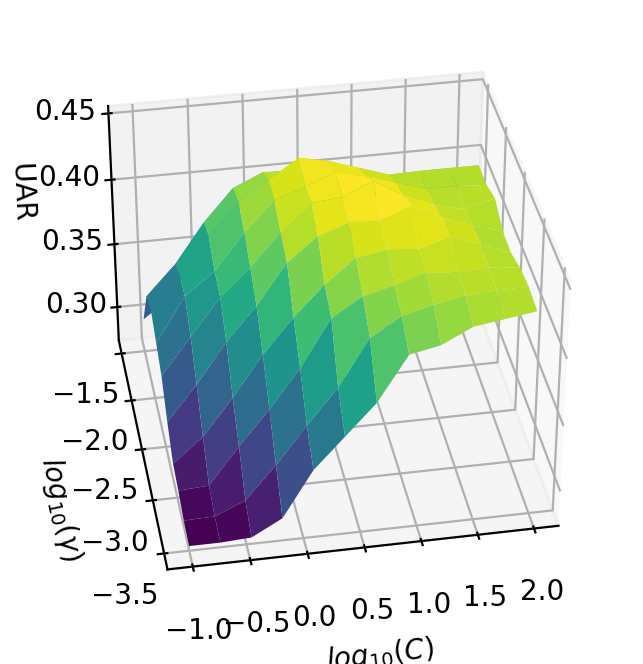

In [5]:
fig = plt.figure(dpi=200)
ax = plt.axes(projection='3d')

log_g, log_C = np.meshgrid(np.log10(gamma),np.log10(C))

# ax.plot_surface(np.log10(C), np.log10(gamma), UAR_surf, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
ax.plot_surface(log_C, log_g, UAR_surf, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')                
# ax.scatter(log_C, log_g, UAR_surf, c=UAR_surf, cmap='viridis', linewidth=0.5)
# ax.bar3d(np.log10(C), np.log10(gamma), UAR_surf,dx=1, dy=1, dz=1)
ax.set_xlabel('$log_{10}(C)$')
ax.set_ylabel('$log_{10}(\gamma)$')
# ax.set_title('UAR')
ax.set_zlabel('$\mathrm{UAR}$')
ax.view_init(35, 260)
# plt.show()
image_path = "Doc/figures/UAR_svm_rbf_4096.jpg"
fig.savefig(image_path, format='jpg', dpi=200, bbox_inches='tight', pad_inches=0.2)

# Confusion matrix

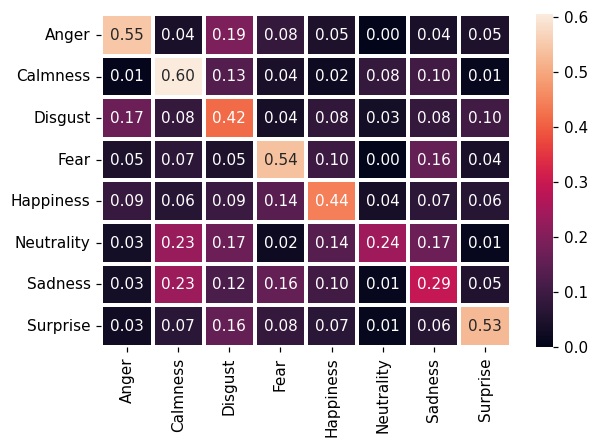

Saving confusion matrix with name:  Doc/figures/confusion_matrix_eng.jpg


In [6]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)